In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


In [3]:
import numpy as np
%matplotlib inline

In [4]:
circ = QuantumCircuit(2)

circ.x(1)

circ.h(0)
circ.cx(0,1)

circ.x(0)
circ.z(0)

circ.cx(0,1)
circ.h(0)


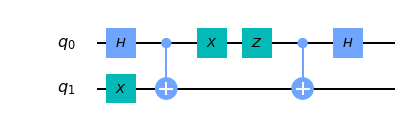

In [5]:
circ.draw()

In [7]:
backend = Aer.get_backend('statevector_simulator')

In [8]:
job = execute(circ, backend)

In [9]:
job.status()

<JobStatus.DONE: 'job has successfully run'>

In [10]:
result = job.result()

In [11]:
outputstate = result.get_statevector(circ, decimals=3)
print(outputstate)

[0.+0.j 1.-0.j 0.+0.j 0.+0.j]


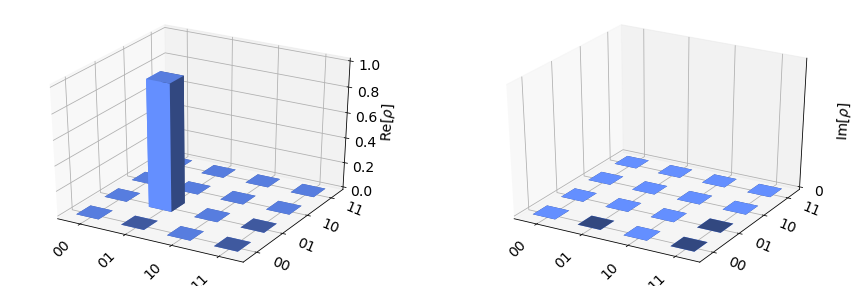

In [12]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)

In [15]:
backend = Aer.get_backend('unitary_simulator')
job = execute(circ, backend)
result = job.result()

# Show the results
out2 = result.get_unitary(circ, decimals=3)
print(out2)

[[ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 1.-0.j -0.-0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j -1.+0.j]
 [ 0.+0.j  0.+0.j  1.-0.j -0.-0.j]]


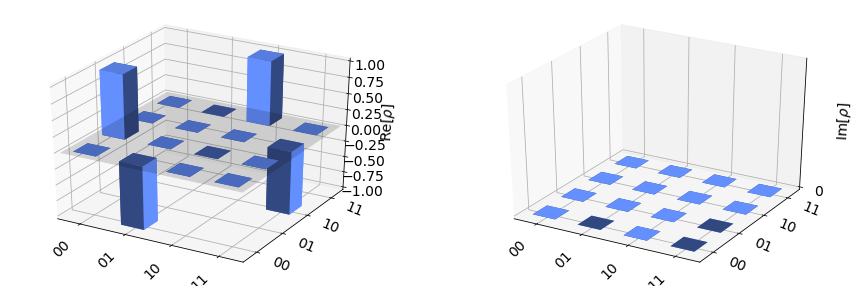

In [16]:
plot_state_city(out2)

# OpenQASM backend

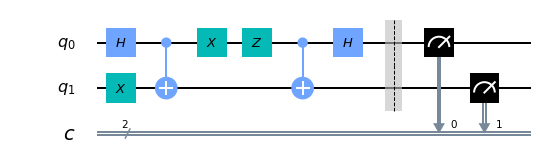

In [23]:
meas = QuantumCircuit(2, 2)

meas.barrier(range(2))
# map the quantum measurement to the classical bits
meas.measure(range(2),range(2))

# The Qiskit circuit object supports composition using
# the addition operator.
qc = circ+meas

#drawing the circuit
qc.draw()

In [24]:
# Use Aer's qasm_simulator
backend_sim = Aer.get_backend('qasm_simulator')

# Execute the circuit on the qasm simulator.
# We've set the number of repeats of the circuit
# to be 1024, which is the default.
job_sim = execute(qc, backend_sim, shots=1024)

# Grab the results from the job.
result_sim = job_sim.result()

In [25]:
counts = result_sim.get_counts(qc)
print(counts)

{'01': 1024}


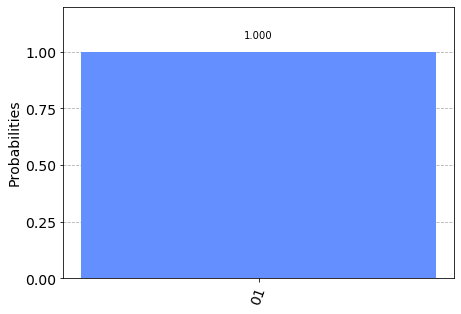

In [26]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)